# PREDICTING WHITE WINE QUALITY

### LIBRARIES

In [413]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplots
import seaborn as sns
import statsmodels.api as sm

### DATA CLEANING AND PREPROCESSING

In [414]:
wine = pd.read_csv("C:\\Users\\HP SPECTRE\\Downloads\\GSU\\analytical\\ASS\\whitewine.csv", delimiter =";")
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [415]:
# we are rating quality into 2. quality <= 5 is bad while quality >5 is good 

wine["quality evaluation"] = np.where(wine["quality"] <= 5, "Bad", "Good")

In [416]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality evaluation
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Good
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Bad
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Good
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,Good


In [417]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality evaluation      0
dtype: int64

In [418]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality evaluation    4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [419]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [420]:
wine["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='quality', ylabel='count'>

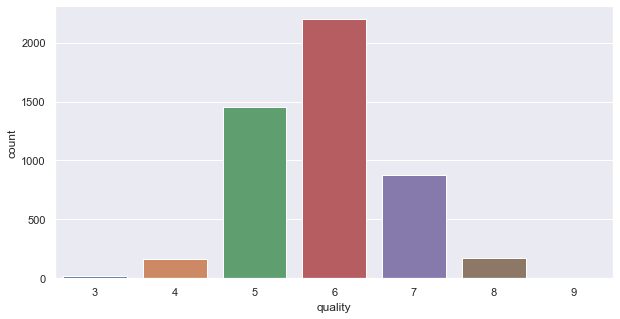

In [500]:
sns.set()
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x=wine["quality"], palette='deep', ax=ax)

From the dataset, wine quality is rated on a scale of 1 to 10. The barchart above shows that wine with the quality of 6 have the highest count, followed by wines with the rate of 5, while those with the rating of 9 have the least count with 5 followed by 3 with 20 as values count

In [422]:
wine["quality evaluation"].value_counts()

Good    3258
Bad     1640
Name: quality evaluation, dtype: int64

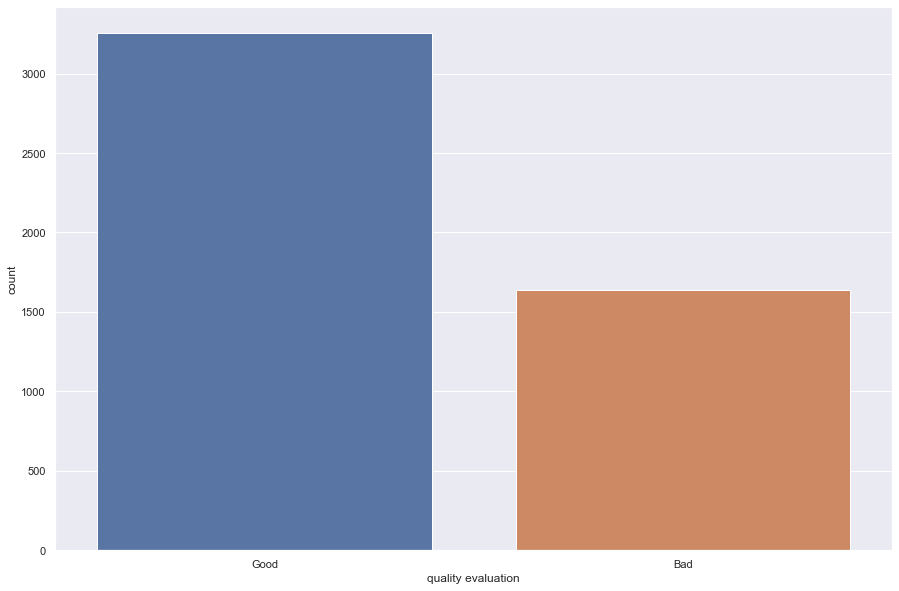

In [497]:
sns.set()
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x=wine["quality evaluation"], palette='deep', ax=ax)
plt.savefig("goodbad")

We previously categorized wines with lesser than or equal to 5 grade as "bad" and those with higher than 5 grade as "good". The barchart above shows that the wines with good grade have the highest count in the dataset with over 3000 counts and those with bad ratings have about 1,500 counts

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

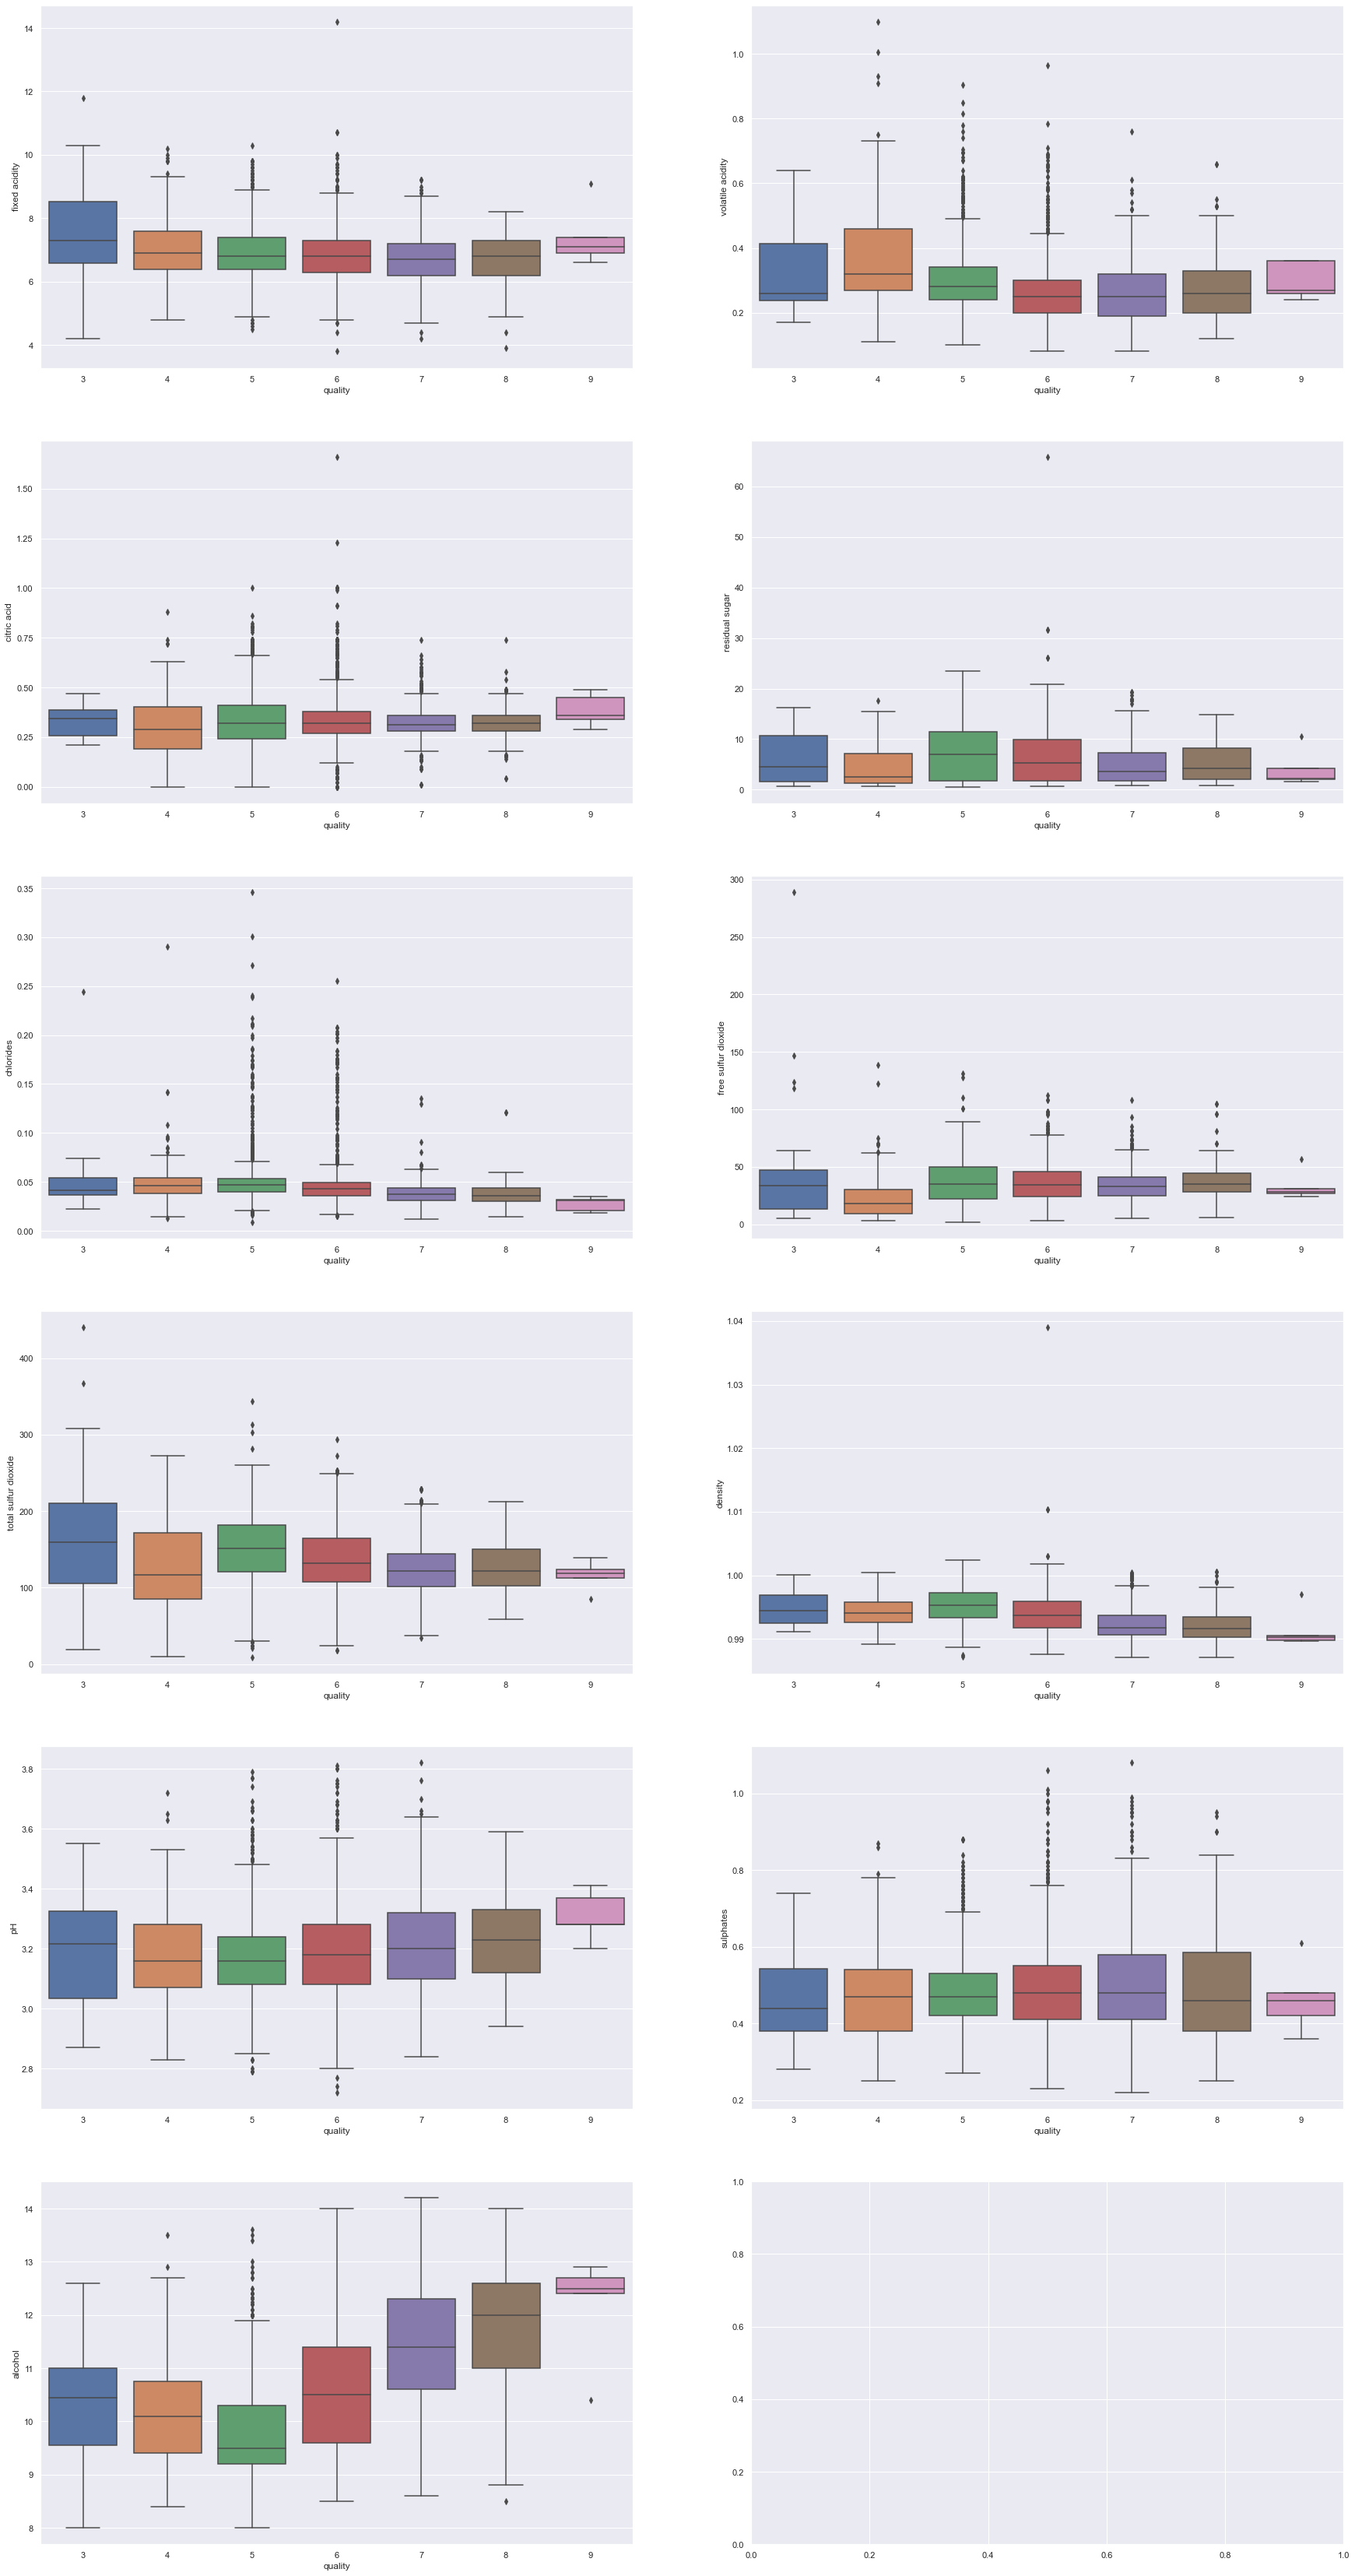

In [424]:
fig,ax=plt.subplots(6,2,figsize=(30,60))
sns.boxplot(x=wine["quality"], y = wine["fixed acidity"],ax=ax[0,0])
sns.boxplot(x=wine["quality"], y = wine["volatile acidity"],ax=ax[0,1])
sns.boxplot(x=wine["quality"], y = wine["citric acid"],ax=ax[1,0])
sns.boxplot(x=wine["quality"], y = wine["residual sugar"],ax=ax[1,1])
sns.boxplot(x=wine["quality"], y = wine["chlorides"],ax=ax[2,0])
sns.boxplot(x=wine["quality"], y = wine["free sulfur dioxide"],ax=ax[2,1])
sns.boxplot(x=wine["quality"], y = wine["total sulfur dioxide"],ax=ax[3,0])
sns.boxplot(x=wine["quality"], y = wine["density"],ax=ax[3,1])
sns.boxplot(x=wine["quality"], y = wine["pH"],ax=ax[4,0])
sns.boxplot(x=wine["quality"], y = wine["sulphates"],ax=ax[4,1])
sns.boxplot(x=wine["quality"], y = wine["alcohol"],ax=ax[5,0])






The above is a boxplot of all the predictors against wine quality showing the percentiles of each one the qualities

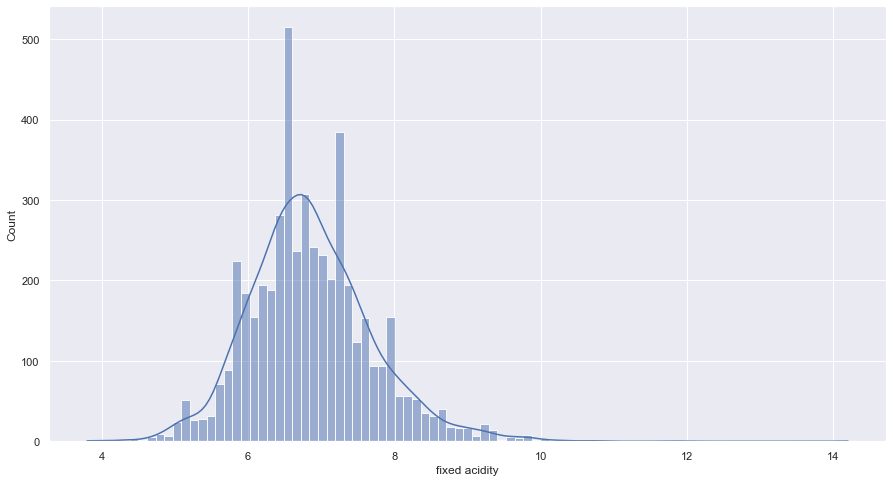

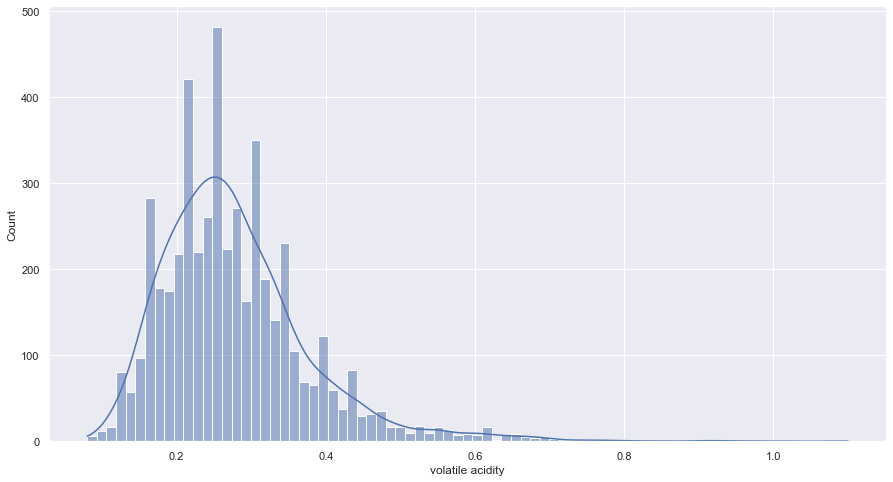

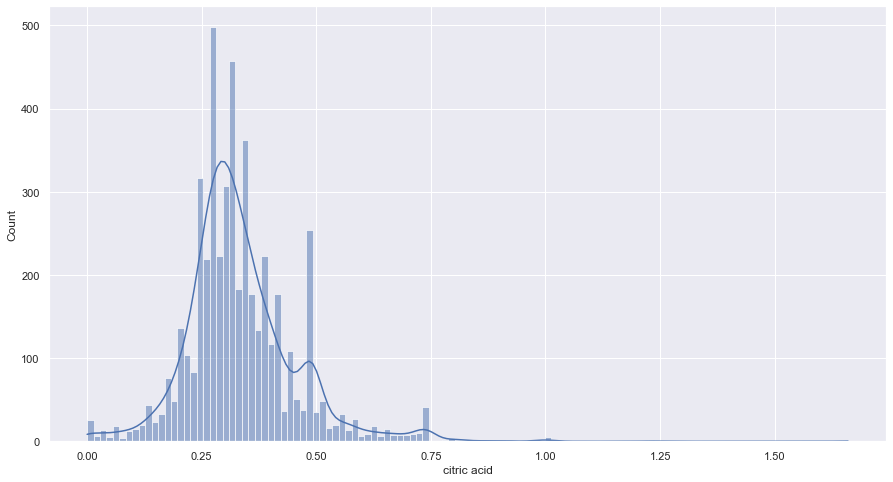

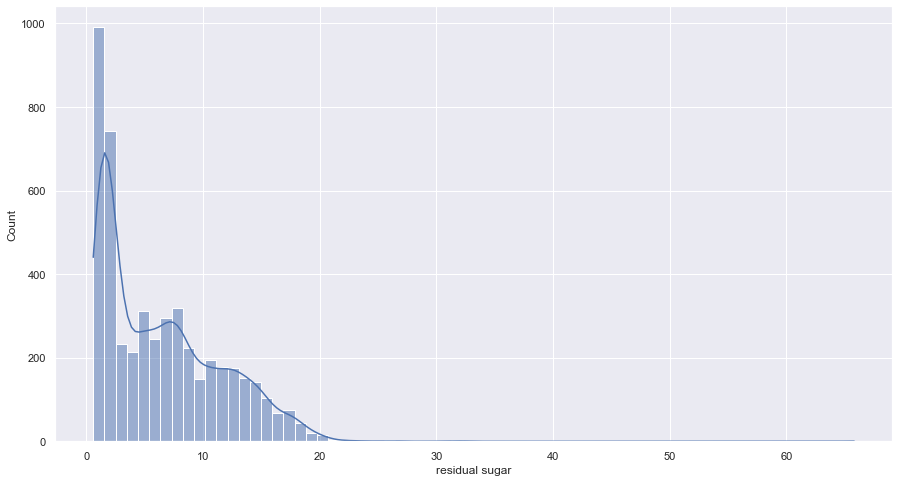

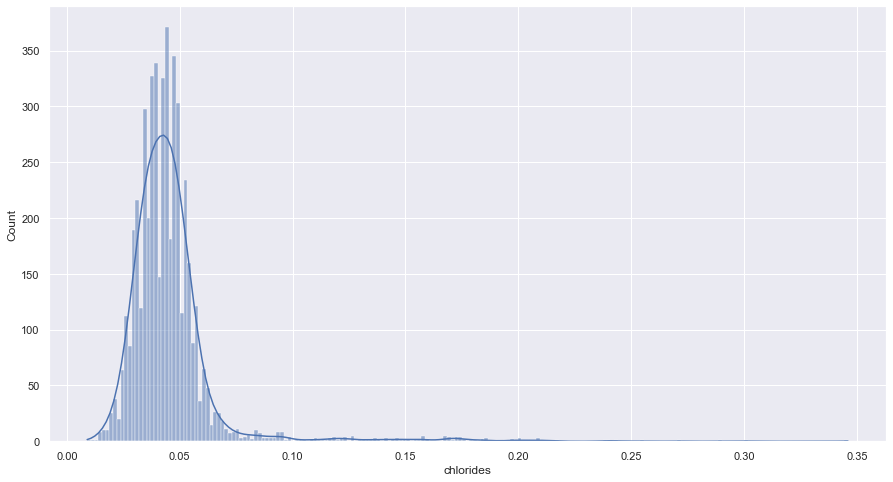

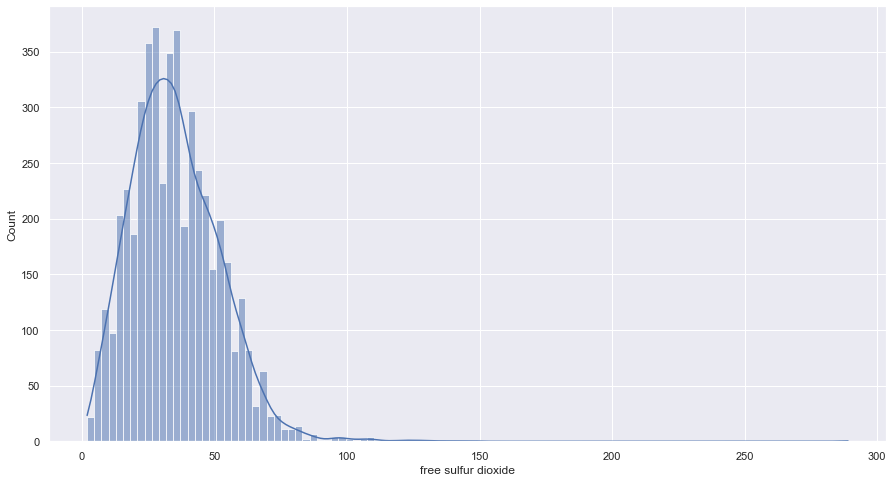

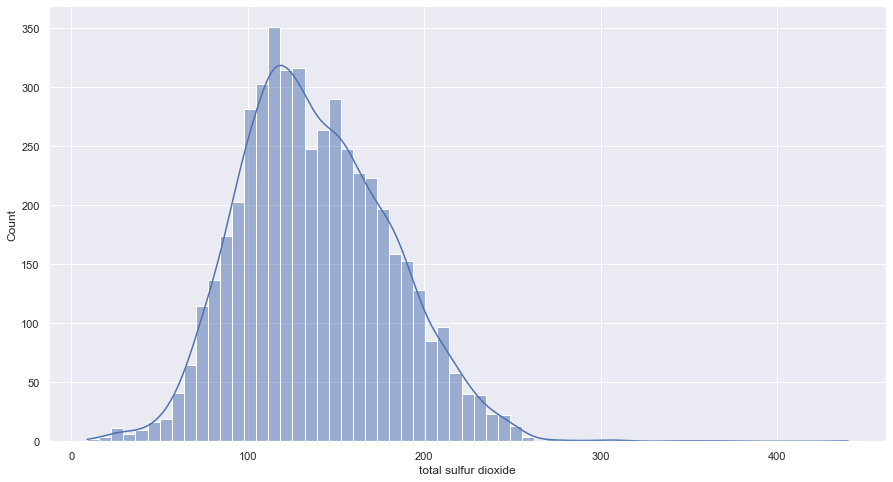

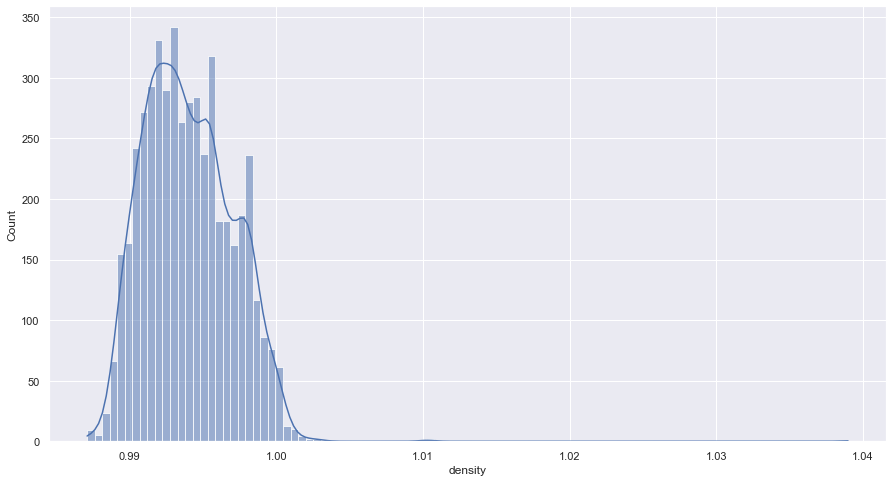

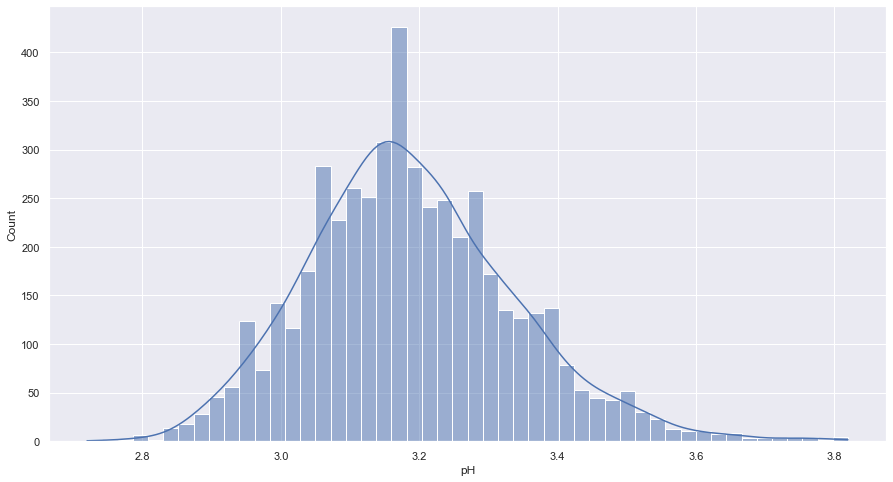

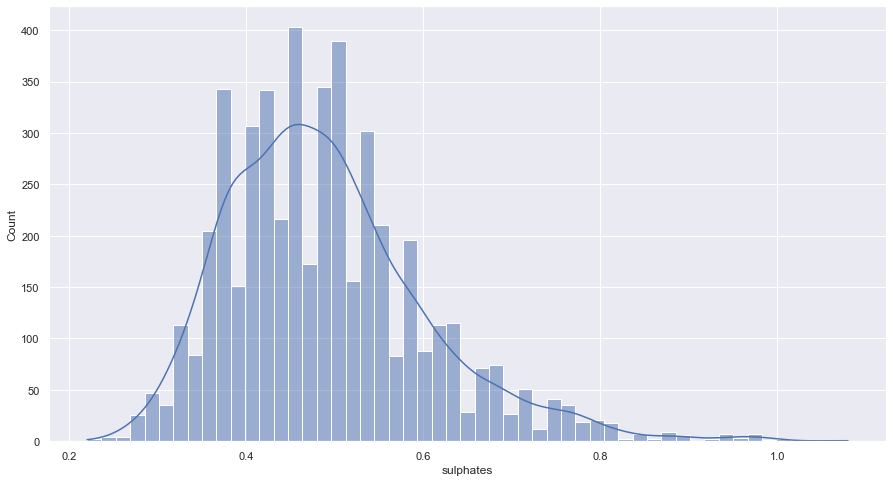

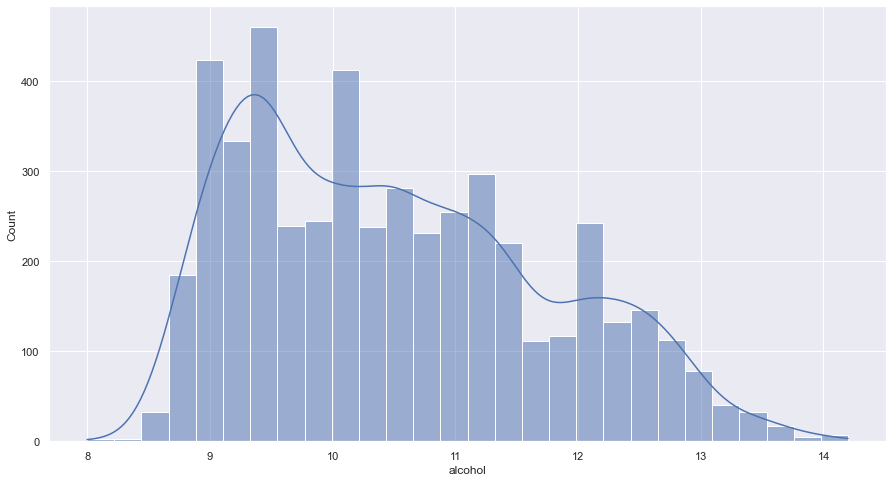

In [425]:
features = wine.columns.drop(["quality", "quality evaluation"])
for feature in features:
    plt.figure(figsize=(15, 8))
    sns.histplot(wine[feature],kde=True)

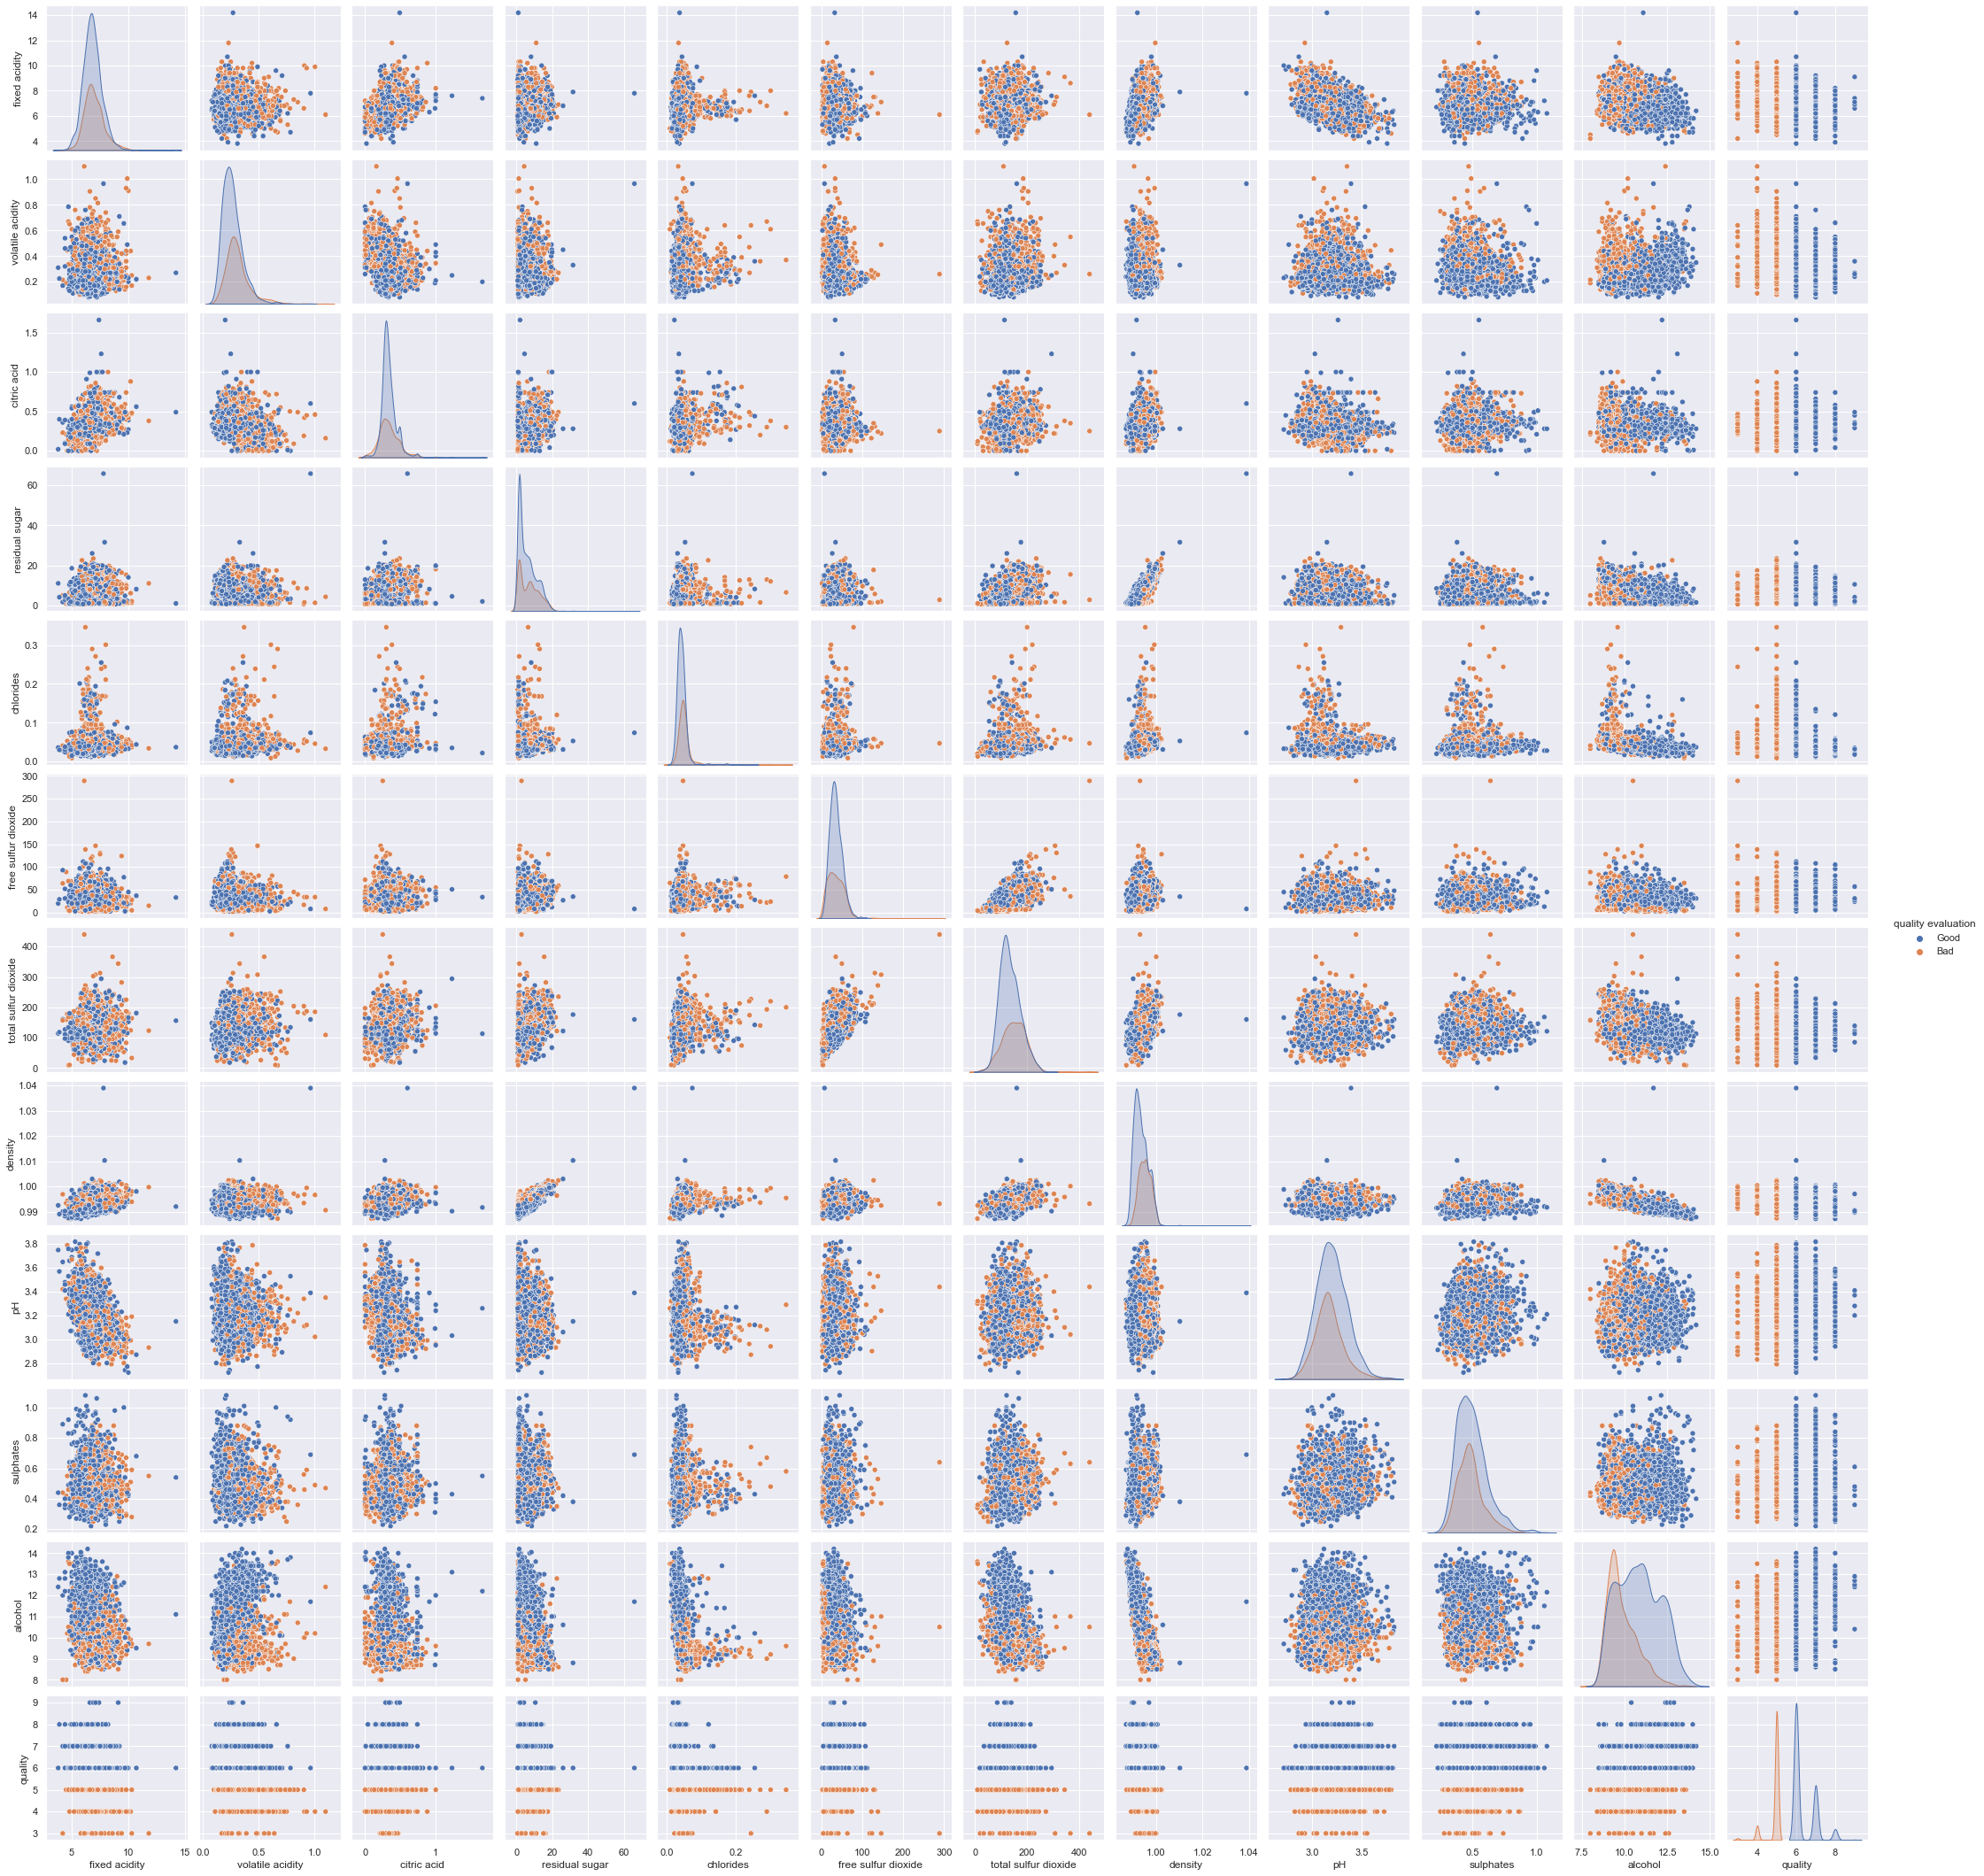

In [445]:
sns.pairplot(wine, hue = "quality evaluation")

From the scatterplot above: 1.Fixed acidity has a negative correlation with PH.
2.Fixed acidity has a positive correlation with citric acid.
3.Mostly all wines with high density are good wines.
4.alcohol has correlation with mostly.
5.Mostly all wines with more alcohol tend to have a quality of been a good wine.
6.residual sugar have a positive correlation with density.
7.free sulphur chloride has a positive correlation with total sulfur chloride.
8.volatile acidity and residual sugar graph. The lesser the amount of these predictor the better the wine.

Text(0.5, 1.0, 'Correlation')

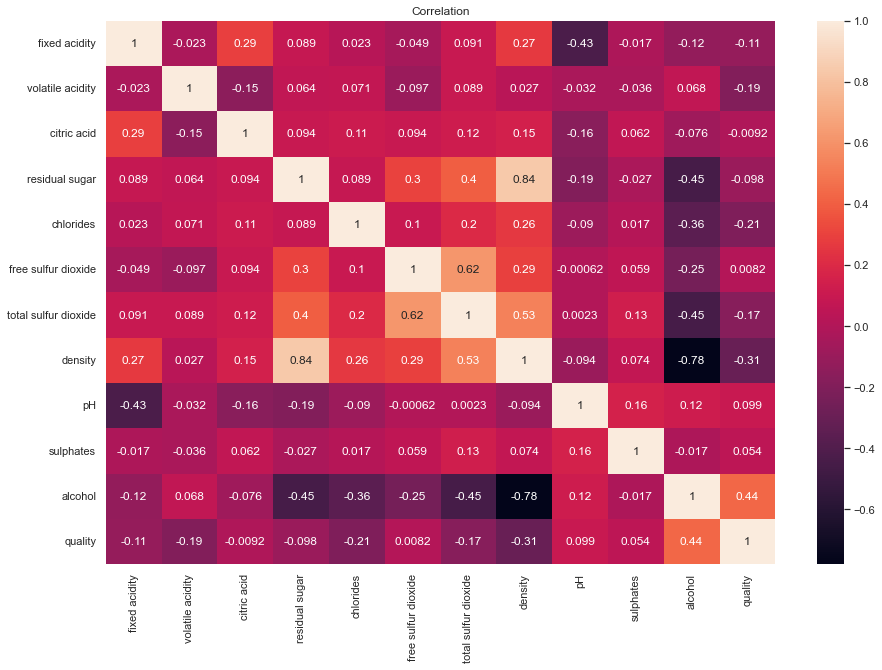

In [427]:
plt.figure(figsize=(15, 10))
sns.heatmap(wine.corr(), annot=True)
plt.title("Correlation")

from the correlation heatmap above we can see that density as high correlation with residual sugar

### CLASSIFICATION LIBRARIES

In [428]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA ,
    QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler as SC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from ISLP.models import (ModelSpec as MS)


### LOGISTIC REGRESSION

In [483]:
variables = wine.columns.drop(["quality","quality evaluation"])
design = MS(variables)
x = design.fit_transform(wine)
y = wine["quality evaluation"] == "Good"
(x_train ,
x_test ,
y_train ,
y_test) = train_test_split(x ,
                           y ,
                           train_size=0.8,
                           random_state=0)
sc = SC()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model = LogisticRegression(solver='liblinear')
model.fit(x_train , y_train)
model_pred = model.predict(x_test)
L_test = np.where(y_test == True, "Good", "Bad")
labels = np.where(model_pred== True, 'Good', 'Bad')
lgct=confusion_table(labels , L_test)
print ("Shape of x_train:",x_train.shape)
print ("Shape of x_test:",x_test.shape)
print ("Shape of y_train:",y_train.shape)
print ("Shape of y_test:",y_test.shape)

Shape of x_train: (3918, 12)
Shape of x_test: (980, 12)
Shape of y_train: (3918,)
Shape of y_test: (980,)


In [484]:
lgct

Truth,Bad,Good
Predicted,,
Bad,165,68
Good,190,557


In [485]:
TN=lgct.iloc[0,0]
TP=lgct.iloc[1,1]
FN=lgct.iloc[0,1]
FP=lgct.iloc[1,0]
accuracy=(TP+TN)/(TP+TN+FP+FN)
precision=TP/(TP+FP)
recall = TP/(TP+FN)
f1score = ((2*precision*recall)/(precision+recall))
lgperformance=pd.DataFrame({'measure':['accuracy','precision',
                                     'recall','f1 score'],
                          'value':[accuracy,precision,recall,f1score]})
lgperformance.set_index("measure")

,value
measure,
accuracy,0.736735
precision,0.745649
recall,0.891200
f1 score,0.811953


### LINEAR DISCRIMINANT ANALYSIS

In [486]:
model = LDA()
model.fit(x_train , y_train)
model_pred = model.predict(x_test)
model_test = np.where(y_test == True, "Good", "Bad")
label = np.where(model_pred== True, 'Good', 'Bad')
ldact =confusion_table(label , model_test)
ldact

Truth,Bad,Good
Predicted,,
Bad,161,71
Good,194,554


In [487]:
TN=ldact.iloc[0,0]
TP=ldact.iloc[1,1]
FN=ldact.iloc[0,1]
FP=ldact.iloc[1,0]
accuracy=(TP+TN)/(TP+TN+FP+FN)
precision=TP/(TP+FP)
recall = TP/(TP+FN)
f1score = ((2*precision*recall)/(precision+recall))
ldaperformance=pd.DataFrame({'measure':['accuracy','precision',
                                     'recall','f1 score'],
                          'value':[accuracy,precision,recall,f1score]})
ldaperformance.set_index("measure")

,value
measure,
accuracy,0.729592
precision,0.740642
recall,0.886400
f1 score,0.806992


### NAIVE BAYES

In [488]:
model = GaussianNB()
model.fit(x_train , y_train)
model_pred = model.predict(x_test)
model_test = np.where(y_test == True, "Good", "Bad")
label = np.where(model_pred== True, 'Good', 'Bad')
NBct =confusion_table(label , model_test)
NBct

Truth,Bad,Good
Predicted,,
Bad,185,137
Good,170,488


In [489]:
TN=NBct.iloc[0,0]
TP=NBct.iloc[1,1]
FN=NBct.iloc[0,1]
FP=NBct.iloc[1,0]
accuracy=(TP+TN)/(TP+TN+FP+FN)
precision=TP/(TP+FP)
recall = TP/(TP+FN)
f1score = ((2*precision*recall)/(precision+recall))
NBperformance=pd.DataFrame({'measure':['accuracy','precision',
                                     'recall','f1 score'],
                          'value':[accuracy,precision,recall,f1score]})
NBperformance.set_index("measure")

,value
measure,
accuracy,0.686735
precision,0.741641
recall,0.780800
f1 score,0.760717


### KNN

In [490]:
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(x_train , y_train)
model1_pred = model1.predict(x_test)
model1_test = np.where(y_test == True, "Good", "Bad")
label = np.where(model1_pred== True, 'Good', 'Bad')
knnct=confusion_table(label , model1_test)
knnct

Truth,Bad,Good
Predicted,,
Bad,239,85
Good,116,540


In [491]:
TN=knnct.iloc[0,0]
TP=knnct.iloc[1,1]
FN=knnct.iloc[0,1]
FP=knnct.iloc[1,0]
accuracy=(TP+TN)/(TP+TN+FP+FN)
precision=TP/(TP+FP)
recall = TP/(TP+FN)
f1score = ((2*precision*recall)/(precision+recall))
knnperformance=pd.DataFrame({'measure':['accuracy','precision',
                                     'recall','f1 score'],
                          'value':[accuracy,precision,recall,f1score]})
knnperformance.set_index("measure")

,value
measure,
accuracy,0.794898
precision,0.823171
recall,0.864000
f1 score,0.843091


### RANDOM FOREST

In [492]:
from sklearn.ensemble import RandomForestClassifier

In [493]:
RF = RandomForestClassifier(n_estimators=200,max_depth=15)
RF.fit(x_train,y_train)
model1_pred = RF.predict(x_test)
model1_test = np.where(y_test == True, "Good", "Bad")
label = np.where(model1_pred== True, 'Good', 'Bad')
RFct=confusion_table(label , model1_test)
RFct

Truth,Bad,Good
Predicted,,
Bad,229,46
Good,126,579


In [494]:
TN=RFct.iloc[0,0]
TP=RFct.iloc[1,1]
FN=RFct.iloc[0,1]
FP=RFct.iloc[1,0]
accuracy=(TP+TN)/(TP+TN+FP+FN)
precision=TP/(TP+FP)
recall = TP/(TP+FN)
f1score = ((2*precision*recall)/(precision+recall))
RFperformance=pd.DataFrame({'measure':['accuracy','precision',
                                     'recall','f1 score'],
                          'value':[accuracy,precision,recall,f1score]})
RFperformance.set_index("measure")

,value
measure,
accuracy,0.824490
precision,0.821277
recall,0.926400
f1 score,0.870677


### LINE GRAPH OF THE EVALUATION MEASURES

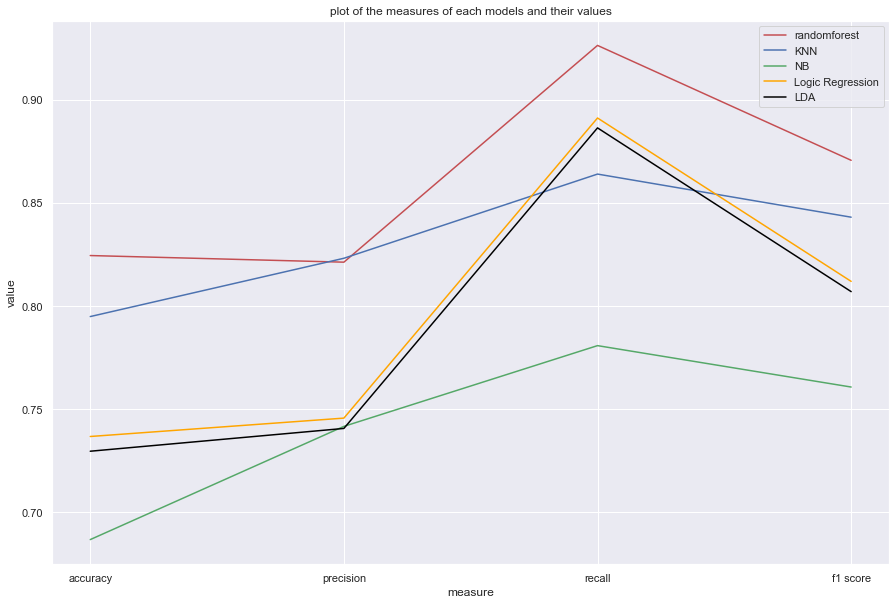

In [496]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = RFperformance['measure'], y=RFperformance['value'], color = "r", label = "randomforest" )
sns.lineplot(x = knnperformance['measure'], y=knnperformance['value'], color = "b", label = "KNN" )
sns.lineplot(x = NBperformance['measure'], y=NBperformance['value'], color = "g", label = "NB" )
sns.lineplot(x = lgperformance['measure'], y=lgperformance['value'], color = "orange", label = "Logic Regression" )
sns.lineplot(x = ldaperformance['measure'], y=ldaperformance['value'], color = "black", label = "LDA" )
plt.title("plot of the measures of each models and their values")
plt.legend()
plt.savefig("plot of measure of each models")

The graph above shows a visual representation of how all the models performed.RandomForest has the highest accuracy of 82%, second highest precision of 82%(closely competing with KNN at 82.3%) , it has the highest recall of 93% and the highest f1 score of 87%. This proves that Random forest is the best model for this prediction